# Modeling with Logistic Regression, SVM, and Random Forest

This notebook performs TF-IDF vectorization of news headlines and evaluates three classification models using 5-fold cross-validation:
- Logistic Regression
- Support Vector Machine (SVM)
- Random Forest

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Load and Prepare Data

In [2]:
fake = pd.read_csv('../data/Fake.csv')
real = pd.read_csv('../data/True.csv')

fake['label'] = 0
real['label'] = 1

df = pd.concat([fake, real], ignore_index=True)
X = df['title'].astype(str)
y = df['label']


## TF-IDF Vectorization

In [3]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = tfidf.fit_transform(X)

## Cross-Validation Setup

In [4]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Logistic Regression


In [5]:
lr = LogisticRegression(max_iter=1000)
lr_scores = cross_val_score(lr, X_tfidf, y, cv=cv, scoring='f1')
print("Logistic Regression F1 (mean):", lr_scores.mean())

Logistic Regression F1 (mean): 0.9421398063551107


## Support Vector Machine

In [6]:
svm = SVC(kernel='linear')
svm_scores = cross_val_score(svm, X_tfidf, y, cv=cv, scoring='f1')
print("SVM F1 (mean):", svm_scores.mean())

SVM F1 (mean): 0.9479319730243942


## Random Forest

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf, X_tfidf, y, cv=cv, scoring='f1')
print("Random Forest F1 (mean):", rf_scores.mean())

Random Forest F1 (mean): 0.9419646530941282


## Model Comparison

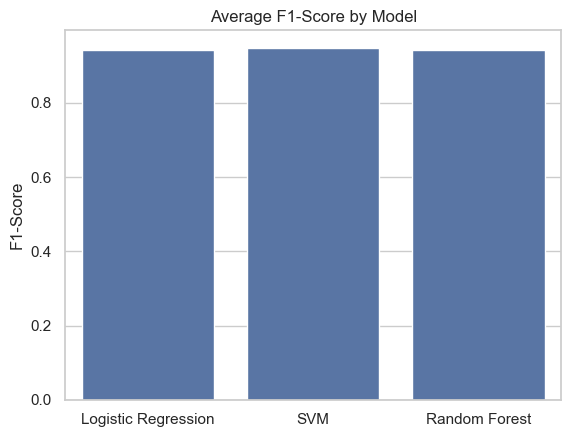

In [8]:
scores = {
    "Logistic Regression": lr_scores.mean(),
    "SVM": svm_scores.mean(),
    "Random Forest": rf_scores.mean()
}

sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title("Average F1-Score by Model")
plt.ylabel("F1-Score")
plt.show()
